In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import ensemble

In [2]:
# Importing the rent dataset

dataset_df = pd.read_csv('lagosrent.csv')

dataset_df.head()

,rent,location,bedroom,bathroom,toilet,parking
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,NaN
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,NaN
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,NaN


## Exploratory Data Analysis

In [3]:
# Viewing the summary of the dataset

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      16800 non-null  int64  
 1   location  16800 non-null  object 
 2   bedroom   15111 non-null  float64
 3   bathroom  15111 non-null  float64
 4   toilet    15011 non-null  float64
 5   parking   8434 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 787.6+ KB


The dataset has null values

In [4]:
dataset_df.describe()

,rent,bedroom,bathroom,toilet,parking
count,1.680000e+04,15111.000000,15111.000000,15011.000000,8434.000000
mean,7.335518e+06,3.707101,4.639733,4.752848,4.760849
std,1.239409e+07,2.899367,9.858156,3.869861,5.735366
min,1.200000e+03,1.000000,1.000000,1.000000,1.000000
25%,1.200000e+06,2.000000,2.000000,3.000000,2.000000
50%,5.500000e+06,4.000000,4.000000,4.000000,2.000000
75%,5.500000e+06,4.000000,4.000000,5.000000,3.000000
max,6.000000e+07,15.000000,120.000000,20.000000,20.000000


In [5]:
# Viewing the number of unique values in the imported dataset

dataset_df.nunique()

rent        19
location    27
bedroom      6
bathroom     7
toilet       7
parking      5
dtype: int64

Text(0, 0.5, 'Value Counts')

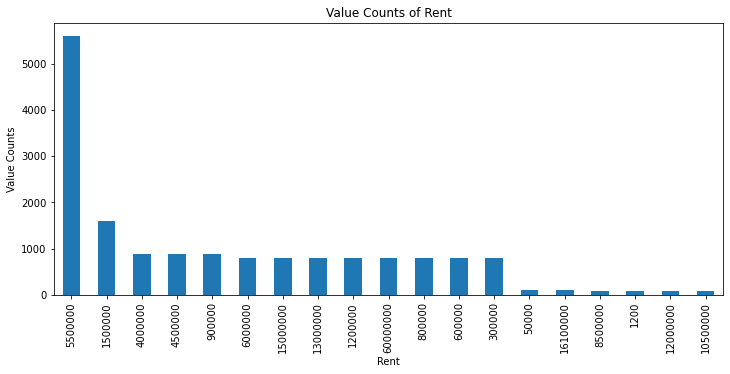

In [6]:
dataset_df['rent'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of Rent')
plt.xlabel('Rent')
plt.ylabel('Value Counts')

From the above plot, we can see a rent of 1200, which is impossible. The rows containing 'rent' = 1200 will be handled later.

Text(0, 0.5, 'Value Counts')

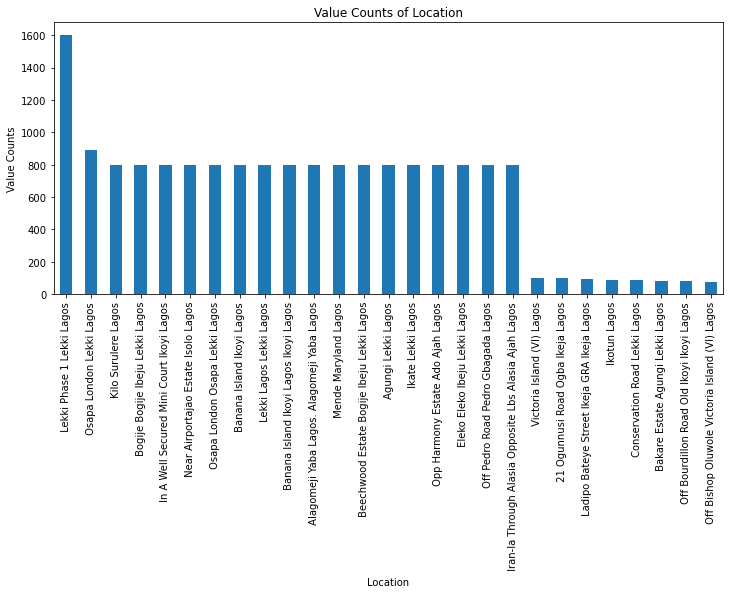

In [7]:
dataset_df['location'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of Location')
plt.xlabel('Location')
plt.ylabel('Value Counts')

Text(0, 0.5, 'Value Counts')

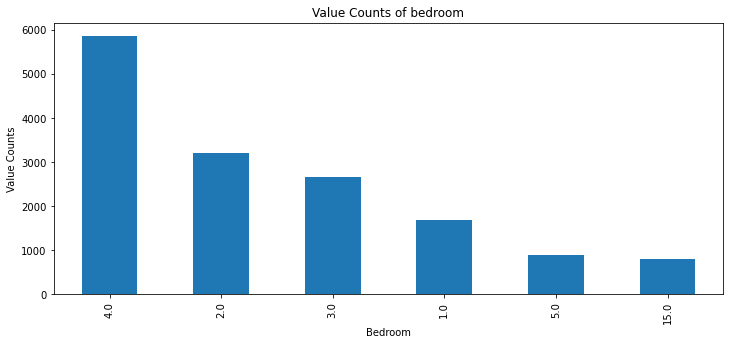

In [8]:
dataset_df['bedroom'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Value Counts')

Text(0, 0.5, 'Value Counts')

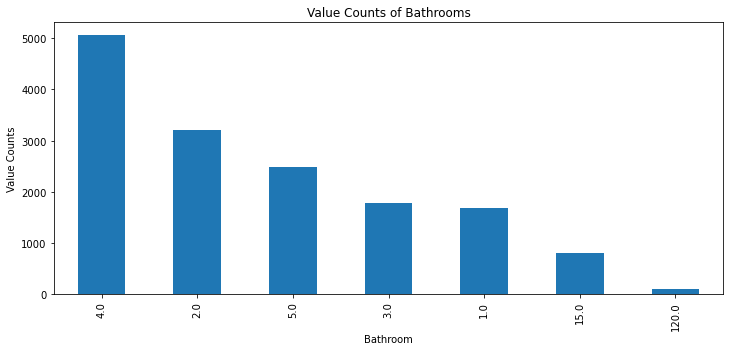

In [9]:
dataset_df['bathroom'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of Bathrooms')
plt.xlabel('Bathroom')
plt.ylabel('Value Counts')

120 bathrooms looks unsual for a residential home. This will be handled later.

Text(0, 0.5, 'Value Counts')

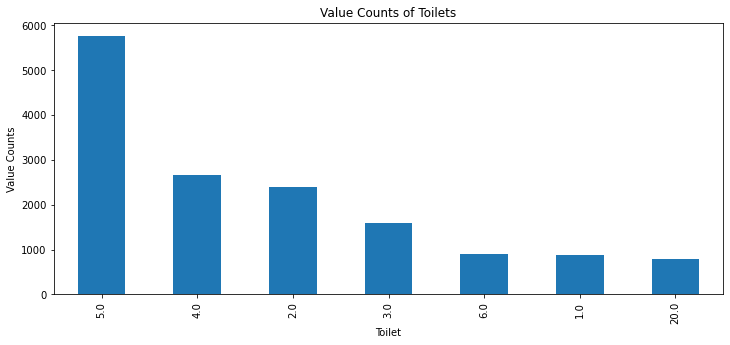

In [10]:
dataset_df['toilet'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of Toilets')
plt.xlabel('Toilet')
plt.ylabel('Value Counts')

Text(0, 0.5, 'Value Counts')

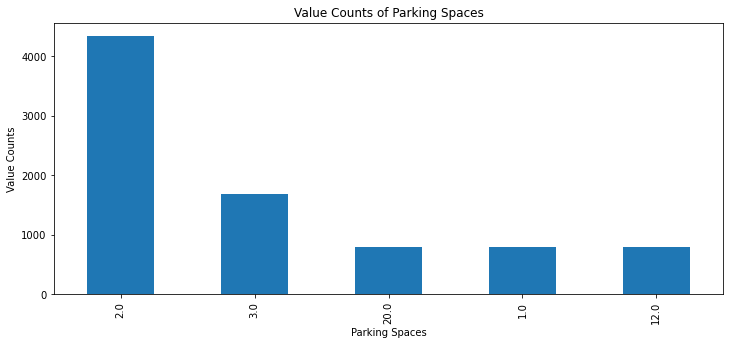

In [11]:
dataset_df['parking'].value_counts().plot(kind='bar', figsize = (12,5))
plt.title('Value Counts of Parking Spaces')
plt.xlabel('Parking Spaces')
plt.ylabel('Value Counts')

In [12]:
# Checking for null values in the dataset

dataset_df.isnull().sum()

rent           0
location       0
bedroom     1689
bathroom    1689
toilet      1789
parking     8366
dtype: int64

In [13]:
null_bedroom = dataset_df["bedroom"].isnull().sum()

null_bathroom = dataset_df["bathroom"].isnull().sum()

null_toilet = dataset_df["toilet"].isnull().sum()

null_parking = dataset_df["parking"].isnull().sum()

num_entries = len(dataset_df)


print(f"Percentage of null bedrooms: {round(null_bedroom/num_entries*100)}%")
print(f"Percentage of null bathrooms: {round(null_bathroom/num_entries*100)}%")
print(f"Percentage of null toilets: {round(null_toilet/num_entries*100)}%")
print(f"Percentage of null parking spaces: {round(null_parking/num_entries*100)}%")

Percentage of null bedrooms: 10%
Percentage of null bathrooms: 10%
Percentage of null toilets: 11%
Percentage of null parking spaces: 50%


In [14]:
# Checking the 'location' feature

dataset_df.groupby('location').count()

,rent,bedroom,bathroom,toilet,parking
location,,,,,
21 Ogunnusi Road Ogba Ikeja Lagos,100,100,100,0,0
Agungi Lekki Lagos,800,800,800,800,800
Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,800,800,800,800,0
Bakare Estate Agungi Lekki Lagos,84,84,84,84,0
Banana Island Ikoyi Lagos,800,0,0,0,0
Banana Island Ikoyi Lagos Ikoyi Lagos,800,800,800,800,800
Beechwood Estate Bogije Ibeju Lekki Lagos,800,800,800,800,0
Bogije Bogije Ibeju Lekki Lagos,800,800,800,800,0
Conservation Road Lekki Lagos,85,85,85,85,85


'Banana Island Ikoyi Lagos' and 'Ikotun Lagos' have null values all through, and will be dropped

In [15]:
# Checking the 'bedroom' feature

dataset_df.groupby('bedroom').count()

,rent,location,bathroom,toilet,parking
bedroom,,,,,
1.0,1684,1684,1684,1684,1600
2.0,3200,3200,3200,3200,800
3.0,2667,2667,2667,2667,1867
4.0,5867,5867,5867,5767,3367
5.0,893,893,893,893,0
15.0,800,800,800,800,800


In [16]:
# Checking the 'toilet' feature

dataset_df.groupby('toilet').count()

,rent,location,bedroom,bathroom,parking
toilet,,,,,
1.0,884,884,884,884,800
2.0,2400,2400,2400,2400,800
3.0,1600,1600,1600,1600,800
4.0,2667,2667,2667,2667,1867
5.0,5767,5767,5767,5767,3367
6.0,893,893,893,893,0
20.0,800,800,800,800,800


In [17]:
# Checking the 'bathroom' feature

dataset_df.groupby('bathroom').count()

,rent,location,bedroom,toilet,parking
bathroom,,,,,
1.0,1684,1684,1684,1684,1600
2.0,3200,3200,3200,3200,800
3.0,1774,1774,1774,1774,974
4.0,5060,5060,5060,5060,3460
5.0,2493,2493,2493,2493,800
15.0,800,800,800,800,800
120.0,100,100,100,0,0


In [18]:
# Checking the 'parking' feature

parking_grouped = dataset_df.groupby('parking').count()

parking_grouped

,rent,location,bedroom,bathroom,toilet
parking,,,,,
1.0,800,800,800,800,800
2.0,4349,4349,4349,4349,4349
3.0,1685,1685,1685,1685,1685
12.0,800,800,800,800,800
20.0,800,800,800,800,800


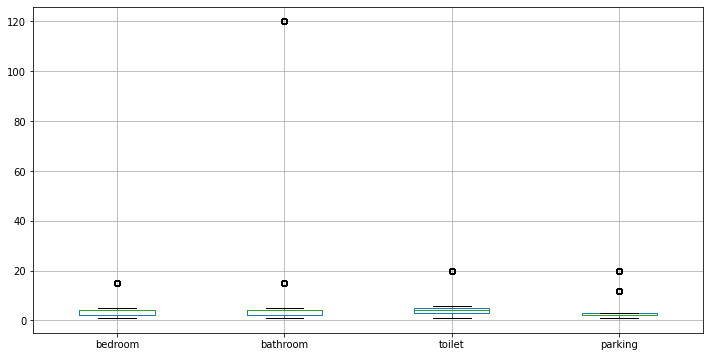

In [19]:
# Checking for outliers in the features

dataset_df[["bedroom", "bathroom", "toilet", "parking"]].boxplot(figsize = (12,6))

plt.show()

## Data Cleaning

In [20]:
# Making a copy of the original dataset

data_df = dataset_df.copy()

In [21]:
# Dropping the locations 'Banana Island Ikoyi Lagos' and 'Ikotun Lagos' which have null values in all the features

data_df = data_df.set_index("location")

data_df.drop([" Banana Island Ikoyi Lagos", " Ikotun Lagos"], inplace=True)

data_df.head()

,rent,bedroom,bathroom,toilet,parking
location,,,,,
Conservation Road Lekki Lagos,4500000,4.0,4.0,5.0,3.0
Osapa London Osapa Lekki Lagos,5500000,4.0,4.0,5.0,3.0
Bogije Bogije Ibeju Lekki Lagos,5500000,3.0,3.0,4.0,NaN
Beechwood Estate Bogije Ibeju Lekki Lagos,5500000,4.0,4.0,5.0,NaN
Eleko Eleko Ibeju Lekki Lagos,5500000,4.0,4.0,5.0,NaN


In [22]:
# Dropping the rows with 'bathroom' == 120

data_df = data_df[data_df.bathroom != 120]

In [23]:
data_df.reset_index(inplace=True)

data_df.head()

,location,rent,bedroom,bathroom,toilet,parking
0,Conservation Road Lekki Lagos,4500000,4.0,4.0,5.0,3.0
1,Osapa London Osapa Lekki Lagos,5500000,4.0,4.0,5.0,3.0
2,Bogije Bogije Ibeju Lekki Lagos,5500000,3.0,3.0,4.0,NaN
3,Beechwood Estate Bogije Ibeju Lekki Lagos,5500000,4.0,4.0,5.0,NaN
4,Eleko Eleko Ibeju Lekki Lagos,5500000,4.0,4.0,5.0,NaN


In [24]:
# Rechecking the number of null values
data_df.isnull().sum()

location       0
rent           0
bedroom      800
bathroom     800
toilet       800
parking     7377
dtype: int64

In [25]:
data_df.shape

(15811, 6)

In [26]:
rent_list = list(data_df.rent.unique())

rent_list = sorted(rent_list)

print(rent_list)

[300000, 600000, 800000, 900000, 1200000, 1500000, 4000000, 4500000, 5500000, 6000000, 8500000, 10500000, 12000000, 13000000, 15000000, 16100000, 60000000]


In [27]:
def null_filler(data, col):
    """
    The function takes in a dataset with null values, 
    performs conditional mode imputation for null values on the specified column, and 
    returns a cleaned data.
    
    """
    
    for Rent in rent_list:
        if 200000 < Rent <= 600000:
            filler = data[data['rent'].apply(lambda x: 200000 < x <= 600000)][col].mode()[0]
            df1 = data[data['rent'].apply(lambda x: 200000 < x <= 600000)].fillna({col: filler})
            
            
        elif 600000 < Rent <= 1000000: 
            filler = data[data['rent'].apply(lambda x: 600000 < x <= 1000000)][col].mode()[0]
            df2 = data[data['rent'].apply(lambda x: 600000 < x <= 1000000)].fillna({col: filler})
            
        elif 1000000 < Rent <= 3000000: 
            filler = data[data['rent'].apply(lambda x: 1000000 < x <= 3000000)][col].mode()[0]
            df3 = data[data['rent'].apply(lambda x: 1000000 < x <= 3000000)].fillna({col: filler})
            
        elif 3000000 < Rent <= 5000000: 
            filler = data[data['rent'].apply(lambda x: 3000000 < x <= 5000000)][col].mode()[0]
            df4 = data[data['rent'].apply(lambda x: 3000000 < x <= 5000000)].fillna({col: filler})
            
        elif 5000000 < Rent <= 8000000: 
            filler = data[data['rent'].apply(lambda x: 5000000 < x <= 8000000)][col].mode()[0]
            df5 = data[data['rent'].apply(lambda x: 5000000 < x <= 8000000)].fillna({col: filler})
            
        elif 8000000 < Rent <= 12000000: 
            filler = data[data['rent'].apply(lambda x: 8000000 < x <= 12000000)][col].mode()[0]
            df6 = data[data['rent'].apply(lambda x: 8000000 < x <= 12000000)].fillna({col: filler})
            
        else: 
            filler = data[data['rent'].apply(lambda x: 12000000 < x <= 18000000)][col].mode()[0]
            df7 = data[data['rent'].apply(lambda x: 12000000 < x <= 18000000)].fillna({col: filler})
    
    
    data = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0).reset_index(drop=True)
    
    return data

In [28]:
# Filling the null values in the 'bedroom' column

non_null_data = null_filler(data_df, 'bedroom')

non_null_data.isnull().sum()

location       0
rent           0
bedroom        0
bathroom     800
toilet       800
parking     7377
dtype: int64

In [29]:
# Filling the null values in the 'bathroom' column

non_null_data = null_filler(non_null_data, 'bathroom')

non_null_data.isnull().sum()

location       0
rent           0
bedroom        0
bathroom       0
toilet       800
parking     7377
dtype: int64

In [30]:
# Filling the null values in the 'toilet' column

non_null_data = null_filler(non_null_data, 'toilet')

non_null_data.isnull().sum()

location       0
rent           0
bedroom        0
bathroom       0
toilet         0
parking     7377
dtype: int64

In [31]:
# Filling the null values in the 'parking' column

non_null_data = null_filler(non_null_data, 'parking')

non_null_data.isnull().sum()

location    0
rent        0
bedroom     0
bathroom    0
toilet      0
parking     0
dtype: int64

In [32]:
cleaned_data = non_null_data

cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking
0,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0
1,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0
2,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0
3,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0
4,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0


In [33]:
cleaned_data.shape

(15011, 6)

In [34]:
# Summary statistics of the cleaned data

cleaned_data.describe()

,rent,bedroom,bathroom,toilet,parking
count,1.501100e+04,15011.000000,15011.000000,15011.000000,15011.000000
mean,4.718646e+06,3.118913,3.284991,3.953434,2.852775
std,4.049385e+06,1.150348,1.278865,1.396256,2.268644
min,3.000000e+05,1.000000,1.000000,1.000000,1.000000
25%,1.200000e+06,2.000000,2.000000,3.000000,2.000000
50%,5.500000e+06,3.000000,4.000000,4.000000,2.000000
75%,5.500000e+06,4.000000,4.000000,5.000000,3.000000
max,1.610000e+07,5.000000,5.000000,6.000000,12.000000


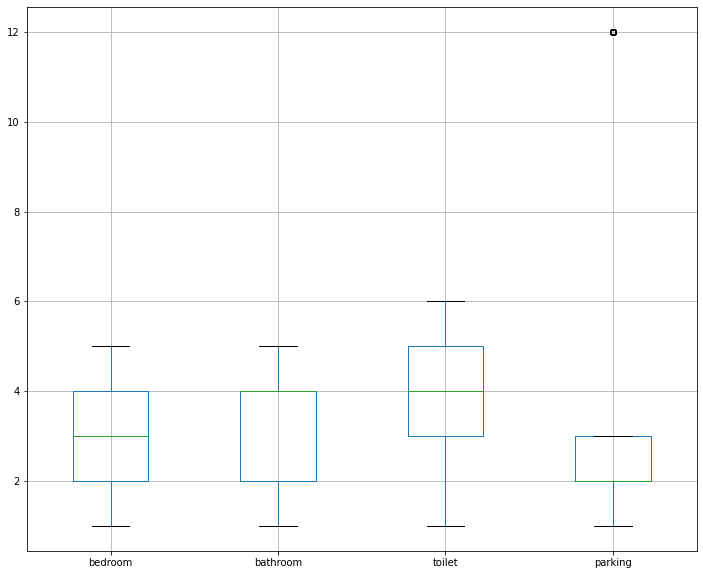

In [35]:
cleaned_data[["bedroom", "bathroom", "toilet", "parking"]].boxplot(figsize = (12,10))

plt.show()

The plot above reveals that the outliers have been taken care of. The 12 parking spaces is a possibility and cannot be intepreted as an outlier.

### Feature Engineering

In [36]:
location_dict = {'Bogije Bogije Ibeju Lekki Lagos':'Bogije Ibeju_Lekki Lagos', 
                 'Eleko Eleko Ibeju Lekki Lagos':'Eleko Ibeju_Lekki Lagos',
                 'Beechwood Estate Bogije Ibeju Lekki Lagos':'Beechwood Estate Bogije Ibeju_Lekki Lagos'}

cleaned_data.replace(location_dict, inplace=True)

In [37]:
# Creating a column for the Districts in Lagos

def get_district(location):
    """ The function extracts 'districts' from the location entries """
    
    return location.split(' ')[-2]

cleaned_data['district'] = cleaned_data['location'].apply(lambda x: get_district(x))

In [38]:
cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking,district
0,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah
1,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah
2,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah
3,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah
4,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah


In [39]:
cleaned_data['district'].value_counts()

Lekki       7462
Ikoyi       1682
Ajah        1600
Yaba         800
Isolo        800
Gbagada      800
Surulere     800
Maryland     800
(VI)         174
Ikeja         93
Name: district, dtype: int64

In [40]:
# Renaming 'VI' to Victoria Island

cleaned_data.replace({'(VI)': 'Victoria Island'}, inplace=True)

cleaned_data['district'].value_counts()

Lekki              7462
Ikoyi              1682
Ajah               1600
Yaba                800
Isolo               800
Gbagada             800
Surulere            800
Maryland            800
Victoria Island     174
Ikeja                93
Name: district, dtype: int64

In [41]:
# Creating a column for island districts

district_dict1 = {'Ajah':'yes', 'Gbagada':'no', 'Ikeja':'no', 'Ikoyi':'yes', 'Isolo':'no', 
                 'Lekki':'yes', 'Maryland':'no', 'Surulere':'no', 'Victoria Island':'yes', 'Yaba':'no'}

cleaned_data['island'] = cleaned_data['district'].replace(district_dict1)

cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking,district,island
0,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes
1,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah,yes
2,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes
3,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah,yes
4,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes


In [42]:
cleaned_data['island'].value_counts()

yes    10918
no      4093
Name: island, dtype: int64

In [43]:
# Generating a column for industrial districts

district_dict2 = {'Ajah':'no', 'Gbagada':'yes', 'Ikeja':'yes', 'Ikoyi':'no', 'Isolo':'yes', 
                 'Lekki':'no', 'Maryland':'no', 'Surulere':'yes', 'Victoria Island':'no', 'Yaba':'no'}

cleaned_data['industrial'] = cleaned_data['district'].replace(district_dict2)

cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes,no
1,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah,yes,no
2,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes,no
3,Opp Harmony Estate Ado Ajah Lagos,600000,2.0,2.0,2.0,2.0,Ajah,yes,no
4,Iran-la Through Alasia Opposite Lbs Alasia Aj...,300000,1.0,1.0,1.0,2.0,Ajah,yes,no


In [44]:
# Shuffling the cleaned dataset

cleaned_data = cleaned_data.sample(cleaned_data.shape[0]).reset_index(drop=True)

cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,Osapa London Osapa Lekki Lagos,5500000,4.0,4.0,5.0,3.0,Lekki,yes,no
1,In A Well Secured Mini Court Ikoyi Lagos,13000000,4.0,5.0,5.0,3.0,Ikoyi,yes,no
2,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,1500000,2.0,2.0,3.0,2.0,Yaba,no,no
3,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,1500000,2.0,2.0,3.0,2.0,Yaba,no,no
4,Kilo Surulere Lagos,800000,2.0,2.0,2.0,1.0,Surulere,no,yes


In [45]:
project_data_cleaned = cleaned_data.to_csv('project_data_cleaned.csv', index=False)

In [46]:
# Encoding the non-numeric labels

from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

cleaned_data['district'] = label_encode.fit_transform(cleaned_data['district'])
cleaned_data['island'] = label_encode.fit_transform(cleaned_data['island'])
cleaned_data['industrial'] = label_encode.fit_transform(cleaned_data['industrial'])

In [47]:
cleaned_data.head()

,location,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,Osapa London Osapa Lekki Lagos,5500000,4.0,4.0,5.0,3.0,5,1,0
1,In A Well Secured Mini Court Ikoyi Lagos,13000000,4.0,5.0,5.0,3.0,3,1,0
2,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,1500000,2.0,2.0,3.0,2.0,9,0,0
3,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,1500000,2.0,2.0,3.0,2.0,9,0,0
4,Kilo Surulere Lagos,800000,2.0,2.0,2.0,1.0,7,0,1


### Normalizing the dataset

In [48]:
num_data = cleaned_data.drop(columns=['location'])

num_data.head()

,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,5500000,4.0,4.0,5.0,3.0,5,1,0
1,13000000,4.0,5.0,5.0,3.0,3,1,0
2,1500000,2.0,2.0,3.0,2.0,9,0,0
3,1500000,2.0,2.0,3.0,2.0,9,0,0
4,800000,2.0,2.0,2.0,1.0,7,0,1


In [49]:
# Scaling the features with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_data = pd.DataFrame(min_max_scaler.fit_transform(num_data), columns=num_data.columns)

In [50]:
min_max_data.head()

,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,0.329114,0.75,0.75,0.8,0.181818,0.555556,1.0,0.0
1,0.803797,0.75,1.00,0.8,0.181818,0.333333,1.0,0.0
2,0.075949,0.25,0.25,0.4,0.090909,1.000000,0.0,0.0
3,0.075949,0.25,0.25,0.4,0.090909,1.000000,0.0,0.0
4,0.031646,0.25,0.25,0.2,0.000000,0.777778,0.0,1.0


In [51]:
# Scaling the features with StandardScaler

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

std_scaled_data = pd.DataFrame(std_scaler.fit_transform(num_data), columns=num_data.columns)

In [52]:
std_scaled_data.head()

,rent,bedroom,bathroom,toilet,parking,district,island,industrial
0,0.192963,0.765957,0.559115,0.749577,0.064898,0.286654,0.612279,-0.446266
1,2.045157,0.765957,1.341084,0.749577,0.064898,-0.617234,0.612279,-0.446266
2,-0.794875,-0.972706,-1.004823,-0.682873,-0.375909,2.094429,-1.633243,-0.446266
3,-0.794875,-0.972706,-1.004823,-0.682873,-0.375909,2.094429,-1.633243,-0.446266
4,-0.967746,-0.972706,-1.004823,-1.399098,-0.816715,1.190541,-1.633243,2.240817


### Feature Selection

Text(0.5, 1.0, 'Correlation Heatmap')

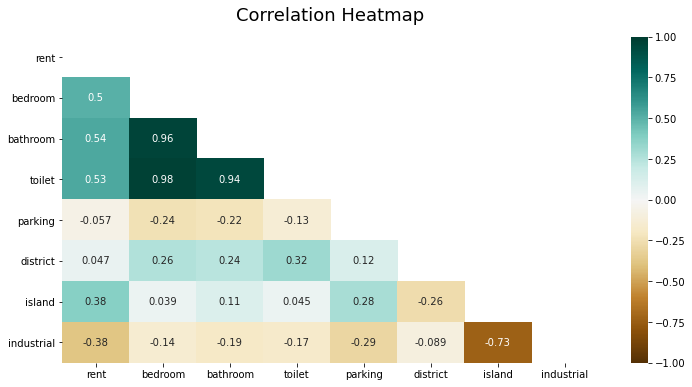

In [53]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(cleaned_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(cleaned_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [54]:
from sklearn.feature_selection import RFE

def rfe_selector(df, model):
    rfe_init = RFE(model, 4)
    
    x = df.drop(columns=['rent'])
    y = df['rent']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    rfe = rfe_init.fit(x_train, y_train)
    
    Rfe = list(zip(x_train.columns,rfe.support_,rfe.ranking_))
    
    return Rfe

In [55]:
rfe_selector(min_max_data, LinearRegression())

C:\Users\Kennedy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[('bedroom', True, 1),
 ('bathroom', False, 2),
 ('toilet', True, 1),
 ('parking', True, 1),
 ('district', False, 4),
 ('island', True, 1),
 ('industrial', False, 3)]

In [56]:
rfe_list = ['bedroom', 'toilet', 'parking', 'island']

### Model Training with all features normalized by MinMaxScaler

In [57]:
def model_fitter(df, model):
    # separating the dataset into 'features' and 'targets'
    x = df.drop(columns=['rent'])
    y = df['rent']
    
    # splitting the 'features' and 'target' into train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    
    # initiate and fit the model on the train variables
    model_init = model
    model_fit = model.fit(x_train, y_train)
    
    # make predictions of and evaluate the model, based on some metrics
    prediction = model.predict(x_test)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    R2_score = round(r2_score(y_test, prediction), 2)
    MAE = round(mean_absolute_error(y_test, prediction), 2)
    RSS = round(np.sum(np.square(y_test - prediction)), 2)
    rmse = round(np.sqrt(mean_squared_error(y_test, prediction)), 2)
    
    print(f'Training score on train data: {train_score}')
    print(f'Training score on test data: {test_score}')
    print(f'r2_score: {R2_score}')
    print(f'MAE score: {MAE}')
    print(f'RSS score: {RSS}')
    print(f'RMSE score: {rmse}')

In [58]:
# Linear Regression Model on MinMax scaled data

model_fitter(min_max_data, LinearRegression())

Training score on train data: 0.4548387879684562
Training score on test data: 0.4473949631084856
r2_score: 0.45
MAE score: 0.14
RSS score: 114.0
RMSE score: 0.19


In [59]:
# Ridge Regression Model on MinMax scaled data

model_fitter(min_max_data, Ridge(alpha=1.0))

Training score on train data: 0.4546929414214571
Training score on test data: 0.446633475785141
r2_score: 0.45
MAE score: 0.14
RSS score: 114.16
RMSE score: 0.19


In [60]:
# Lasso Regression Model on MinMax scaled data

model_fitter(min_max_data, Lasso(alpha=0.001))

Training score on train data: 0.4264793105918888
Training score on test data: 0.411007067460909
r2_score: 0.41
MAE score: 0.14
RSS score: 121.51
RMSE score: 0.2


In [61]:
# Gradient Boosting Regressor on MinMax scaled data

gb_reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')

model_fitter(min_max_data, gb_reg)

Training score on train data: 0.902923603160882
Training score on test data: 0.9033086691365584
r2_score: 0.9
MAE score: 0.06
RSS score: 19.95
RMSE score: 0.08


In [62]:
# Random Forest Regressor on MinMax scaled data

randf_reg = ensemble.RandomForestRegressor(n_estimators=400, random_state=0)

model_fitter(min_max_data, randf_reg)

Training score on train data: 0.9938287234901825
Training score on test data: 0.9957769292356696
r2_score: 1.0
MAE score: 0.0
RSS score: 0.87
RMSE score: 0.02


In [63]:
result1 = {'Model':['r2score', 'mae', 'rss', 'rmse'],
            'Linear regression':[0.46, 0.14, 104.01, 0.19],
           'Rigde regression':[0.46, 0.14, 104.04, 0.19],
           'LASSO regression':[0.43, 0.13, 109.93, 0.19],
           'Gradient boosting regressor':[0.91, 0.06, 18.16, 0.08],
           'Random forest regressor':[0.99, 0.0, 1.09, 0.02]}

result_df = pd.DataFrame(result1)

result_df

,Model,Linear regression,Rigde regression,LASSO regression,Gradient boosting regressor,Random forest regressor
0,r2score,0.46,0.46,0.43,0.91,0.99
1,mae,0.14,0.14,0.13,0.06,0.00
2,rss,104.01,104.04,109.93,18.16,1.09
3,rmse,0.19,0.19,0.19,0.08,0.02


### Model Training with all features normalized by Standard Scaler

In [64]:
# Linear Regression Model on Standard scaled data

model_fitter(std_scaled_data, LinearRegression())

Training score on train data: 0.4548387879684562
Training score on test data: 0.44739496310848537
r2_score: 0.45
MAE score: 0.56
RSS score: 1735.71
RMSE score: 0.76


In [65]:
# Ridge Regression Model on Standard scaled data

model_fitter(std_scaled_data, Ridge(alpha=1.0))

Training score on train data: 0.45483775249362624
Training score on test data: 0.44734069208202554
r2_score: 0.45
MAE score: 0.55
RSS score: 1735.88
RMSE score: 0.76


In [66]:
# Lasso Regression Model on Standard scaled data

model_fitter(std_scaled_data, Lasso(alpha=0.001))

Training score on train data: 0.4546731167359641
Training score on test data: 0.4464538857187963
r2_score: 0.45
MAE score: 0.55
RSS score: 1738.66
RMSE score: 0.76


In [67]:
# Gradient Boosting Regressor on Standard scaled data

gb_reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')

model_fitter(std_scaled_data, gb_reg)

Training score on train data: 0.902923603160882
Training score on test data: 0.9033086691365584
r2_score: 0.9
MAE score: 0.23
RSS score: 303.7
RMSE score: 0.32


In [68]:
# Random Forest Regressor on Standard scaled data

randf_reg = ensemble.RandomForestRegressor(n_estimators=400, random_state=0)

model_fitter(std_scaled_data, randf_reg)

Training score on train data: 0.9938287234901825
Training score on test data: 0.9957769292356696
r2_score: 1.0
MAE score: 0.01
RSS score: 13.26
RMSE score: 0.07


In [69]:
result2 = {'Model':['r2score', 'mae', 'rss', 'rmse'],
            'Linear regression':[0.46, 0.54, 1583.58, 0.73],
           'Rigde regression':[0.46, 0.54, 1583.58, 0.73],
           'LASSO regression':[0.46, 0.54, 1584.25, 0.73],
           'Gradient boosting regressor':[0.91, 0.22, 276.5, 0.3],
           'Random forest regressor':[0.99, 0.01, 16.63, 0.07]}

result2_df = pd.DataFrame(result2)

result2_df

,Model,Linear regression,Rigde regression,LASSO regression,Gradient boosting regressor,Random forest regressor
0,r2score,0.46,0.46,0.46,0.91,0.99
1,mae,0.54,0.54,0.54,0.22,0.01
2,rss,1583.58,1583.58,1584.25,276.50,16.63
3,rmse,0.73,0.73,0.73,0.30,0.07


### Model Training with selected features

In [70]:
rfe_list

['bedroom', 'toilet', 'parking', 'island']

In [71]:
selected_data = min_max_data[['rent'] + rfe_list]

In [72]:
# Linear Regression Model on selected data

model_fitter(selected_data, LinearRegression())

Training score on train data: 0.4442059237775384
Training score on test data: 0.4329236695419447
r2_score: 0.43
MAE score: 0.15
RSS score: 116.99
RMSE score: 0.2


In [73]:
# Ridge Regression Model on selected data

model_fitter(selected_data, Ridge(alpha=1.0))

Training score on train data: 0.4440851526746977
Training score on test data: 0.4323881279639735
r2_score: 0.43
MAE score: 0.14
RSS score: 117.1
RMSE score: 0.2


In [74]:
# Lasso Regression Model on selected data

model_fitter(selected_data, Lasso(alpha=0.001))

Training score on train data: 0.42075901104254276
Training score on test data: 0.4049592901813891
r2_score: 0.4
MAE score: 0.14
RSS score: 122.76
RMSE score: 0.2


In [75]:
# Gradient Boosting Regressor on selected data

gb_reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')

model_fitter(selected_data, gb_reg)

Training score on train data: 0.5469012609194837
Training score on test data: 0.5446743303935098
r2_score: 0.54
MAE score: 0.11
RSS score: 93.93
RMSE score: 0.18


In [76]:
# Random Forest Regressor on selected data

randf_reg = ensemble.RandomForestRegressor(n_estimators=500, random_state=0)

model_fitter(selected_data, randf_reg)

Training score on train data: 0.6012477481469264
Training score on test data: 0.6086968792135685
r2_score: 0.61
MAE score: 0.09
RSS score: 80.73
RMSE score: 0.16


In [77]:
result3 = {'Model':['r2score', 'mae', 'rss', 'rmse'],
            'Linear regression':[0.45, 0.14, 106.68, 0.19],
           'Rigde regression':[0.45, 0.14, 106.69, 0.19],
           'LASSO regression':[0.42, 0.13, 111.11, 86.29],
           'Gradient boosting regressor':[0.55, 0.11, 86.29, 0.17],
           'Random forest regressor':[0.6, 0.09, 76.6, 0.16]}

result3_df = pd.DataFrame(result3)

result3_df

,Model,Linear regression,Rigde regression,LASSO regression,Gradient boosting regressor,Random forest regressor
0,r2score,0.45,0.45,0.42,0.55,0.60
1,mae,0.14,0.14,0.13,0.11,0.09
2,rss,106.68,106.69,111.11,86.29,76.60
3,rmse,0.19,0.19,86.29,0.17,0.16


In [78]:
def model_summ(df):
    """This fits a model to a dataset"""
    
    # separating the dataset into 'features' and 'targets'
    x = df.drop(columns=['rent'])
    y = df['rent']
    
    # splitting the 'features' and 'target' into train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    
    gb_reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')

    models = []
    models.append(('LR', LinearRegression()))
    models.append(('Ridge', Ridge(alpha=0.4)))
    models.append(('Lasso', Lasso(alpha=0.001)))
    models.append(('RFR', RandomForestRegressor(n_estimators=400, random_state=0)))
    models.append(('GBR', gb_reg))

    results = []
    names = []

    scoring = 'r2'

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle = True)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        names.append(name)
    
        print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

In [79]:
model_summ(min_max_data)

LR: 0.452513 (0.010674)
Ridge: 0.452510 (0.010800)
Lasso: 0.423251 (0.015025)
RFR: 0.994118 (0.001540)
GBR: 0.903205 (0.001455)


In [80]:
model_summ(std_scaled_data)

LR: 0.452513 (0.010674)
Ridge: 0.452514 (0.010684)
Lasso: 0.452386 (0.010950)
RFR: 0.994118 (0.001540)
GBR: 0.903205 (0.001455)


### Model Improvement

In [81]:
# Checking for imbalance in the categorical features

min_max_data['island'].value_counts()

1.0    10918
0.0     4093
Name: island, dtype: int64

In [82]:
min_max_data['industrial'].value_counts()

0.0    12518
1.0     2493
Name: industrial, dtype: int64

From the above, it is obvious that the dataset is imbalanced. Undersampling will be used to handle the situation.

In [83]:
def sampler(df, col, n):
    df1 = df[df[col] == 1].sample(n)
    df2 = df[df[col] == 0]
    length = df1.shape[0] + df2.shape[0]
    df_final = pd.concat([df1, df2], axis=0).sample(length)
    
    return df_final

In [84]:
sampler(min_max_data, 'island', 5000).head()

,rent,bedroom,bathroom,toilet,parking,district,island,industrial
6281,0.031646,0.25,0.25,0.2,0.000000,0.777778,0.0,1.0
3209,0.329114,0.75,0.75,0.8,0.181818,0.555556,1.0,0.0
5793,0.329114,0.75,0.75,0.8,0.181818,0.555556,1.0,0.0
11431,0.056962,0.75,0.75,0.8,0.090909,0.444444,0.0,1.0
11253,0.056962,0.75,0.75,0.8,0.090909,0.444444,0.0,1.0


In [85]:
sampled_data = sampler(min_max_data, 'island', 4100)

In [86]:
sampled_data['island'].value_counts()

1.0    4100
0.0    4093
Name: island, dtype: int64

In [87]:
model_fitter(sampled_data, LinearRegression()) 

Training score on train data: 0.5109203310274822
Training score on test data: 0.5147011555117313
r2_score: 0.51
MAE score: 0.11
RSS score: 44.73
RMSE score: 0.17


In [88]:
model_fitter(sampled_data, Ridge(alpha=1.0))

Training score on train data: 0.5108232329693401
Training score on test data: 0.5148135776326319
r2_score: 0.51
MAE score: 0.11
RSS score: 44.72
RMSE score: 0.17


In [89]:
model_fitter(sampled_data, Lasso(alpha=0.001))

Training score on train data: 0.5029745225281945
Training score on test data: 0.5085702332771216
r2_score: 0.51
MAE score: 0.11
RSS score: 45.3
RMSE score: 0.17


In [90]:
gb_reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')

model_fitter(sampled_data, gb_reg)

Training score on train data: 0.9038544449902429
Training score on test data: 0.9039042154492877
r2_score: 0.9
MAE score: 0.06
RSS score: 8.86
RMSE score: 0.07


In [91]:
randf_reg = ensemble.RandomForestRegressor(n_estimators=500, random_state=0)

model_fitter(sampled_data, randf_reg)

Training score on train data: 0.9950230550161138
Training score on test data: 0.9963011807468045
r2_score: 1.0
MAE score: 0.0
RSS score: 0.34
RMSE score: 0.01


In [92]:
result4 = {'Model':['r2score', 'mae', 'rss', 'rmse'],
            'Linear regression':[0.51, 0.11, 44.16, 0.16],
           'Rigde regression':[0.51, 0.11, 44.16, 0.16],
           'LASSO regression':[0.51, 0.11, 44.8, 0.17],
           'Gradient boosting regressor':[0.9, 0.06, 8.87, 0.07],
           'Random forest regressor':[1.0, 0.0, 0.42, 0.02]}

result4_df = pd.DataFrame(result4)

result4_df

,Model,Linear regression,Rigde regression,LASSO regression,Gradient boosting regressor,Random forest regressor
0,r2score,0.51,0.51,0.51,0.90,1.00
1,mae,0.11,0.11,0.11,0.06,0.00
2,rss,44.16,44.16,44.80,8.87,0.42
3,rmse,0.16,0.16,0.17,0.07,0.02


From the above, the GradientBoosting Regressor on the sampled data performed better than others. It will be selected for the task.

In [93]:
x = sampled_data.drop(columns=['rent'])
y = sampled_data['rent']
    
# splitting the 'features' and 'target' into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    
# initiate and fit the model on the train variables
model = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =5, min_samples_split=3, 
                                        learning_rate=0.003, loss='ls')
model_fit = model.fit(x_train, y_train)
    
# make predictions of and evaluate the model, based on some metrics
prediction = model.predict(x_test)

prediction

array([0.43196138, 0.12212342, 0.31068403, ..., 0.09113962, 0.30141931,
       0.30141931])

In [94]:
pred_df = pd.DataFrame(prediction, columns=['predicted rent'])


y_test_df = y_test.to_frame().reset_index(drop=True)

pred_df = pd.concat([y_test_df, pred_df], axis=1)

In [95]:
pred_df

,rent,predicted rent
0,0.518987,0.431961
1,0.075949,0.122123
2,0.360759,0.310684
3,0.018987,0.082287
4,0.075949,0.122123
...,...,...
1634,0.075949,0.122123
1635,0.075949,0.122123
1636,0.031646,0.091140
1637,0.329114,0.301419
